## HW4

## Q1: Calculating the Value Function (5%)
Consider a larger version of the Random Walk problem we discussed in Seminar 4. 
Now we have n non-terminal states instead of 5, i.e., 

F -- 1 -- 2 -- 3 -- 4 -- 5 -- ... -- n-1 -- n -- S.

Arriving at the left terminal state (F) gives a reward of -1 whereas reaching the right terminal state (S) gives a reward of 1. All other transitions give a reward of 0. 

**Task**: Calculate the value function for each non-terminal state and provide a justification for your answers. For this question, coding is not required. Please provide a closed-form expression for the value functions, alongside your mathematical calculations to illustrate your process.

## Answer to Q1: Extended Random Walk Problem

##### Application to the Random Walk Problem
Given a random walk we aim to calculate the value function for each non-terminal state. We have a sequence of states from 1 to n with terminal states F (Fail) and S (Success) on either end. The reward for reaching F is -1, for reaching S it is 1, and it is 0 for all transitions between non-terminal states. The probability of moving between the states, i.e. either moving to the left or to the right is constant at 0.5 (as this is based on the seminar 4 random walk). In general terms, the value of each state is updated considering both immediate and future rewards, using a combination of n-step predictions. We can iteratively compute the value functions using the following alogorithm:

1. **Initialization**: Initialize the value of each non-terminal state, $V(s)$, which can start as 0 for simplicity.
2. **Update Mechanism**: Iteratively update the value functions based on observed transitions and rewards
3. **Estimating Values**: The value of each state reflects its likelihood of leading to a positive or negative outcome, considering the path taken and rewards associated with terminal states.

##### Value Function Calculation
A general update formula is then:

$$\boldsymbol{V}(s) \leftarrow \boldsymbol{V}(s)+\boldsymbol{\alpha}\left[r+\gamma \boldsymbol{V}\left(s^{\prime}\right)-\boldsymbol{V}(s)\right]$$

We want to find a closed form for the value function given the specific random walk problem outlined above. 

##### Considerations:

- Non-zero payoffs only occur at the end points (payoffs of -1 and 1), and the probability for moving between states is constant across states (0.5). Considering this, the value function for a state in the middle (e.g., state $n/2$) should approximately be 0, as it is equidistant from F and S, with values gradually decreasing towards -1 as states approach F and increasing towards 1 as states approach S.
- Similarly, other values for states can be computed linearly based on their distance to F and S.
- The values reflect the expected outcome of reaching either terminal state, balancing the potential future rewards against potential losses.

Based on the above, let us consider the states numbered from 1 to $n$ as a linear space where state 1 is closest to the terminal state F (with reward -1) and state $n$ is closest to the terminal state S (with reward 1). As outlined, each state's value can now be computed based on its position relative to the total number of states, as we have equal transition probabilities. Consequentially, the value function for a state $S_i$ can be formulated as follows:

$$V(S_i)  = g(i)$$

where $i$ is the state's position and $g(i)$ is a linear function with gradient $a$ and intercept $b$:

$$g(i) = a i + b$$

Given the problem specifications we know the values for $i=0$ and $i=n+1$:

$$g(0)=-1$$
$$g(n+1)=1$$

Based on this we derive the parameters of $g(i)$:
$$g(0)=-1= 0 + b \implies b = -1$$

$$g(n+1)=1=a (n+1) - 1 \implies a = \frac{2}{n+1}$$

And it follows:

$$g(i) = \frac{2i}{n+1} - 1$$

And hence:

$$V(i) = \frac{2i}{n+1} - 1$$

To check the forumla we look at some cases:

- **Terminal States**: The terminal state F (failure) has a value of -1, and the terminal state S (success) has a value of 1.

- **State 1**: $$V(1) = -1 + \frac{2}{n + 1}$$
This expression indicates that for a state that is close to F and hence its value is only slightly greater than -1. For the special case $n=1$ the value is 0, and is illustrative of the expression's linearity as this is simply the result of $0.5V(0) + 0.5V(n+1) = 0.5 (-1) + 0.5 (1)=0$

- **Middle State** $i = \frac{n}{2}$: $$V\left(\frac{n}{2}\right) = -1 + \frac{n}{n + 1}$$
This expression approaches 0 for large $n$, representing equidistance from both F and S.

- **State n**: $$V(n) = -1 + \frac{2n}{n + 1}$$
This expression indicates that for a state that is close to S, the vlaue is just under 1.

In conclusion, the expression stated above seems to represent the value function for a given state well.





## Q2: Implement the double Q-learning algorithm on the Cliff Walking example (5%)

The double Q-learning algorithm is a variant of the standard Q-learning algorithm, specifically designed to mitigate the maximization bias (see Pages 39 - 40 on Lecture 4) commonly encountered in the traditional tabular Q-learning approach. The core idea of this algorithm is outlined as follows:

<img src="./graphs/double_q_learning.png" width="750" height="450">

See Pages 39 -- 42 on Lecture 4 for the detailed explanation. The pseudo code of this algorithm is given on Page 42. 

#### Task: Implment the double Q-learning algorithm on Cliff Walking (refer to Page 42 of Lecture 4 for the pseudocode)
- Set the number of runs to 10
- Set the number of episodes to 1000
- Set the learning rate $\alpha$ to 0.1
- Set the discount factor $\gamma$ to 1
- Output the estimated optimal policy
- Plot the average return during episodes, aggregated over 10 runs (see the plot in Seminar 4)

## Answer to Q2: Implementing double Q-learning on the Cliff Walking problem


- Initialize two Q-value tables, $Q_1$ and $Q_2$, arbitrarily for all state-action pairs.
- For each episode, initialize the state of the environment.
- Use an $\varepsilon$-greedy policy derived from the sum of $Q_1$ and $Q_2$ for action selection to balance exploration and exploitation.
- Update the Q-values of $Q_1$ or $Q_2$ based on the outcomes of the actions taken, according to the formulae provided.
- Iterate through a specified number of episodes, updating policies and Q-values.
- Analyze the performance in terms of the average return and the optimal policy discovered.

Double Q-Learning Optimal policy is:
R R R R R R R R R R R D
U U U U U U U R U R R D
U L L U U R R U U U R D
U C C C C C C C C C C G


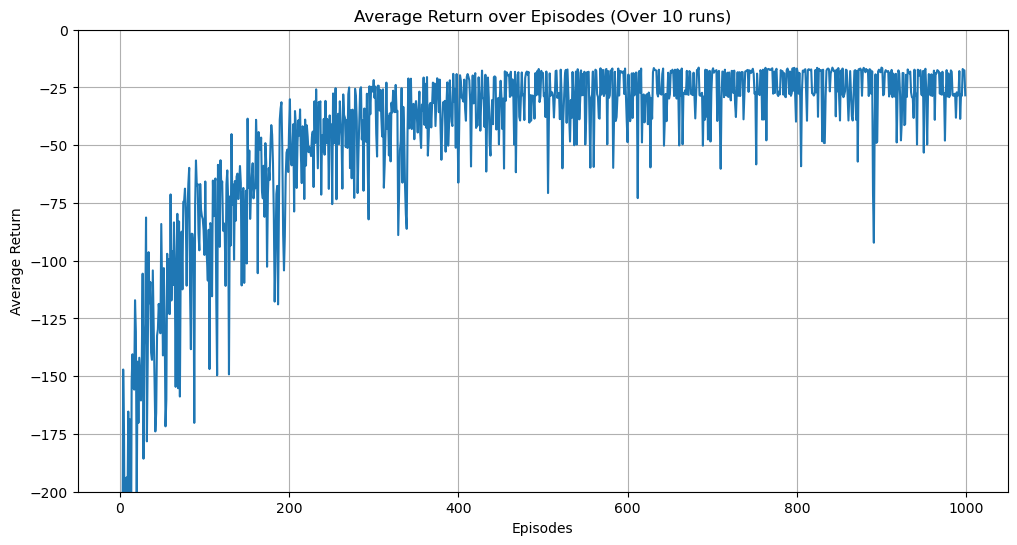

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Cliff walking environment based on the seminar materials
class cliff_walking_env:
    def __init__(self, width=12, height=4):
        self.width = width
        self.height = height
        self.start = (3, 0)
        self.goal = (3, 11)
        self.cliff = [(3, i) for i in range(1, 11)]
        self.state = self.start
        self.actions = [(0, -1), (1, 0), (0, 1), (-1, 0)]

    def step(self, action):
        state = list(self.state)
        state[0] += self.actions[action][0]
        state[1] += self.actions[action][1]
        state[0] = min(max(state[0], 0), self.height - 1)
        state[1] = min(max(state[1], 0), self.width - 1)
        self.state = tuple(state)

        if self.state in self.cliff:
            reward = -100
            self.state = self.start
            done = False
        elif self.state == self.goal:
            reward = 0
            done = True
        else:
            reward = -1
            done = False

        return self.state, reward, done
    
    def reset(self):
        self.state = self.start
        return self.state


# write a double q-learning function based on the q-learning in seminar 4
def double_q_learning(env, episodes, alpha, gamma, epsilon):
    q1 = np.zeros((env.height, env.width, len(env.actions)))
    q2 = np.zeros((env.height, env.width, len(env.actions)))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        # Epsilon greedy policy (different from seminar example)
        while not done:
            if np.random.rand() < epsilon:
                action = np.random.choice(len(env.actions))
            else:
                action = np.argmax(q1[state] + q2[state]) # action based on Q1+Q2 (following pseudo code)

            next_state, reward, done = env.step(action)
            total_reward += reward

            # Randomly decide which Q to update
            if np.random.rand() < 0.5:
                best_next_action = np.argmax(q1[next_state])
                q1[state + (action,)] += alpha * (reward + gamma * q2[next_state + (best_next_action,)] - q1[state + (action,)])
            else:
                best_next_action = np.argmax(q2[next_state])
                q2[state + (action,)] += alpha * (reward + gamma * q1[next_state + (best_next_action,)] - q2[state + (action,)])

            state = next_state

        rewards.append(total_reward)

    # best policy is based on Q1+Q2 (as in pseudocode in the lecture slides)
    policy = np.argmax((q1 + q2), axis=2)
    return policy, rewards

# This is just to print the opitmal policy in the end (based on seminar)
def print_optimal_policy(policy, method, env):
    policy_display = np.empty((env.height, env.width), dtype=str)
    actions = ['L', 'D', 'R', 'U']
    for i in range(env.height):
        for j in range(env.width):
            if (i, j) == env.goal:
                policy_display[i, j] = 'G'
                continue
            if (i, j) in env.cliff:
                policy_display[i, j] = 'C'
                continue
            a = policy[i, j]
            policy_display[i, j] = actions[a]

    print(method + ' Optimal policy is:')
    for row in policy_display:
        print(" ".join(row))

############################################################################################################
############################################################################################################
############################################################################################################
# Run simulation and store rewards and optimal policies
        
episodes = 1000
runs = 10
alpha = 0.1
gamma = 1
epsilon = 0.1

env = cliff_walking_env()

all_rewards = np.zeros((runs, episodes))
all_optimal_policies = []

for run in range(runs):
    optimal_policy, rewards = double_q_learning(env, episodes, alpha, gamma, epsilon)
    all_rewards[run] = rewards
    all_optimal_policies.append([optimal_policy])

average_rewards = all_rewards.mean(axis=0)

print_optimal_policy(optimal_policy, 'Double Q-Learning', env)

plt.figure(figsize=(12, 6))
plt.plot(average_rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Return')
plt.title('Average Return over Episodes (Over 10 runs)')
plt.grid(True)
plt.ylim(-200, 0)
plt.show()
